In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


In [3]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

In [4]:
# Load data from CSV file
data = pd.read_csv('train.csv')


In [5]:
# Preprocess categorical features using one-hot encoding
categorical_features = ['Sex', 'Embarked']
data = pd.get_dummies(data, columns=categorical_features)


In [6]:
# Drop irrelevant columns
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


In [7]:
# Handle missing values
data = data.fillna(0)  # Replace missing values with 0


In [8]:
# Separate features and target variable
X = data.drop('Survived', axis=1).values
y = data['Survived'].values


In [9]:
# Split data into training and testing sets
split_idx = int(0.8 * len(data))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


In [10]:
# Create and train KNN classifier
knn = KNN(k=3)
knn.fit(X_train, y_train)

In [11]:
# Predict on the test set
y_pred = knn.predict(X_test)



In [12]:
# Print the predicted labels
print("Predicted labels:", y_pred)


Predicted labels: [0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1
 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0
 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0]


In [13]:

# Evaluate accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7206703910614525


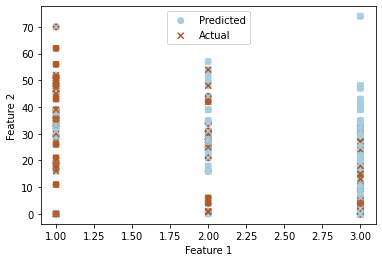

In [14]:

# Plot the predicted and actual labels
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='Paired', label='Predicted')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='Paired', marker='x', label='Actual')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()